In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
data = pd.read_csv("C:/Users/Dareen/OneDrive/Desktop/house price predection/archive (19)/AmesHousing.csv")
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [4]:
print(len((data['PID'].unique())))

2930


In [5]:
data=data.drop(['PID','Order','Alley'],axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2930 non-null   int64  
 1   MS Zoning        2930 non-null   object 
 2   Lot Frontage     2440 non-null   float64
 3   Lot Area         2930 non-null   int64  
 4   Street           2930 non-null   object 
 5   Lot Shape        2930 non-null   object 
 6   Land Contour     2930 non-null   object 
 7   Utilities        2930 non-null   object 
 8   Lot Config       2930 non-null   object 
 9   Land Slope       2930 non-null   object 
 10  Neighborhood     2930 non-null   object 
 11  Condition 1      2930 non-null   object 
 12  Condition 2      2930 non-null   object 
 13  Bldg Type        2930 non-null   object 
 14  House Style      2930 non-null   object 
 15  Overall Qual     2930 non-null   int64  
 16  Overall Cond     2930 non-null   int64  
 17  Year Built    

In [7]:
data= data.loc[data['Gr Liv Area'] <= 4000,:]
print("Number of rows in the data:", data.shape[0])
print("Number of columns in the data:", data.shape[1])
df = data.copy()

Number of rows in the data: 2925
Number of columns in the data: 79


In [8]:
data['Lot Frontage'].fillna(data['Lot Frontage'].mean(), inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2925 entries, 0 to 2929
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2925 non-null   int64  
 1   MS Zoning        2925 non-null   object 
 2   Lot Frontage     2925 non-null   float64
 3   Lot Area         2925 non-null   int64  
 4   Street           2925 non-null   object 
 5   Lot Shape        2925 non-null   object 
 6   Land Contour     2925 non-null   object 
 7   Utilities        2925 non-null   object 
 8   Lot Config       2925 non-null   object 
 9   Land Slope       2925 non-null   object 
 10  Neighborhood     2925 non-null   object 
 11  Condition 1      2925 non-null   object 
 12  Condition 2      2925 non-null   object 
 13  Bldg Type        2925 non-null   object 
 14  House Style      2925 non-null   object 
 15  Overall Qual     2925 non-null   int64  
 16  Overall Cond     2925 non-null   int64  
 17  Year Built       29

In [10]:
one_hot_encode_cols = data.dtypes[data.dtypes == object] 
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  

data[one_hot_encode_cols].head().T

,0,1,2,3,4
MS Zoning,RL,RH,RL,RL,RL
Street,Pave,Pave,Pave,Pave,Pave
Lot Shape,IR1,Reg,IR1,Reg,IR1
Land Contour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub
Lot Config,Corner,Inside,Corner,Corner,Inside
Land Slope,Gtl,Gtl,Gtl,Gtl,Gtl
Neighborhood,NAmes,NAmes,NAmes,NAmes,Gilbert
Condition 1,Norm,Feedr,Norm,Norm,Norm
Condition 2,Norm,Norm,Norm,Norm,Norm


In [11]:
data = pd.get_dummies(data, columns=one_hot_encode_cols, drop_first=True)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MS SubClass,2925.0,57.396581,42.668752,20.0,20.00,50.000000,70.00,190.0
Lot Frontage,2925.0,69.023819,20.720789,21.0,60.00,69.023819,78.00,313.0
Lot Area,2925.0,10103.583590,7781.999124,1300.0,7438.00,9428.000000,11515.00,215245.0
Overall Qual,2925.0,6.088205,1.402953,1.0,5.00,6.000000,7.00,10.0
Overall Cond,2925.0,5.563761,1.112262,1.0,5.00,5.000000,6.00,9.0
Year Built,2925.0,1971.302906,30.242474,1872.0,1954.00,1973.000000,2001.00,2010.0
Year Remod/Add,2925.0,1984.234188,20.861774,1950.0,1965.00,1993.000000,2004.00,2010.0
Mas Vnr Area,2902.0,100.710544,176.034290,0.0,0.00,0.000000,164.00,1600.0
BsmtFin SF 1,2924.0,438.097469,438.032289,0.0,0.00,369.500000,733.25,2288.0
BsmtFin SF 2,2924.0,49.807456,169.300590,0.0,0.00,0.000000,0.00,1526.0


In [12]:
mask = data.dtypes == float
float_cols = data.columns[mask]

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = data[float_cols].skew()

In [13]:
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
BsmtFin SF 2,4.135900
Bsmt Half Bath,3.965970
Mas Vnr Area,2.565458
Lot Frontage,1.217617
Bsmt Unf SF,0.925021
BsmtFin SF 1,0.821985


Text(0.5, 0.98, 'Field "BsmtFin SF 1"')

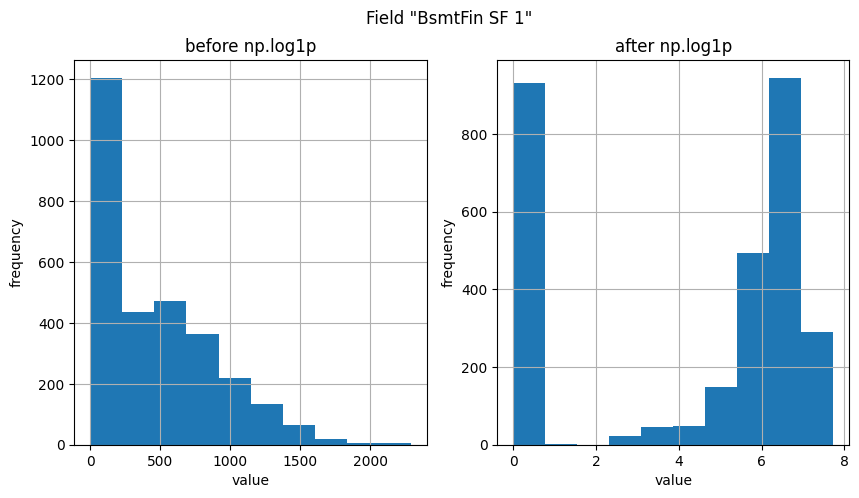

In [14]:
field = "BsmtFin SF 1"
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))
df[field].hist(ax=ax_before)
df[field].apply(np.log1p).hist(ax=ax_after)
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field))

In [15]:
for col in skew_cols.index.values:
    if col == "SalePrice":
        continue
    df[col] = df[col].apply(np.log1p)

In [16]:
data['Lot Frontage'] = data['Lot Frontage'].fillna(0)
data.isnull().sum().sort_values()

MS SubClass            0
Foundation_CBlock      0
Foundation_PConc       0
Foundation_Slab        0
Foundation_Stone       0
                    ... 
Bsmt Unf SF            1
Bsmt Full Bath         2
Bsmt Half Bath         2
Mas Vnr Area          23
Garage Yr Blt        159
Length: 258, dtype: int64

In [37]:
data['Garage Yr Blt'].fillna(data['Garage Yr Blt'].mean(), inplace=True)

In [38]:
data['Mas Vnr Area'].fillna(data['Mas Vnr Area'].mean(), inplace=True)

In [39]:
data.isnull().sum().sort_values()

MS SubClass          0
Foundation_CBlock    0
Foundation_PConc     0
Foundation_Slab      0
Foundation_Stone     0
                    ..
Garage Cars          1
Total Bsmt SF        1
Bsmt Unf SF          1
Bsmt Full Bath       2
Bsmt Half Bath       2
Length: 258, dtype: int64

In [40]:
data.fillna(0)

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,20,141.000000,31770,6,5,1960,1960,112.0,639.0,0.0,...,False,False,False,False,True,False,False,False,True,False
1,20,80.000000,11622,5,6,1961,1961,0.0,468.0,144.0,...,False,False,False,False,True,False,False,False,True,False
2,20,81.000000,14267,6,6,1958,1958,108.0,923.0,0.0,...,False,False,False,False,True,False,False,False,True,False
3,20,93.000000,11160,7,5,1968,1968,0.0,1065.0,0.0,...,False,False,False,False,True,False,False,False,True,False
4,60,74.000000,13830,5,5,1997,1998,0.0,791.0,0.0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,37.000000,7937,6,6,1984,1984,0.0,819.0,0.0,...,False,False,False,False,True,False,False,False,True,False
2926,20,69.023819,8885,5,5,1983,1983,0.0,301.0,324.0,...,False,False,False,False,True,False,False,False,True,False
2927,85,62.000000,10441,5,5,1992,1992,0.0,337.0,0.0,...,False,False,False,False,True,False,False,False,True,False
2928,20,77.000000,10010,5,5,1974,1975,0.0,1071.0,123.0,...,False,False,False,False,True,False,False,False,True,False


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [41]:
x=data.drop(['SalePrice'],axis=1)
y = data.SalePrice

In [42]:
y

0       215000
1       105000
2       172000
3       244000
4       189900
         ...  
2925    142500
2926    131000
2927    132000
2928    170000
2929    188000
Name: SalePrice, Length: 2925, dtype: int64

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

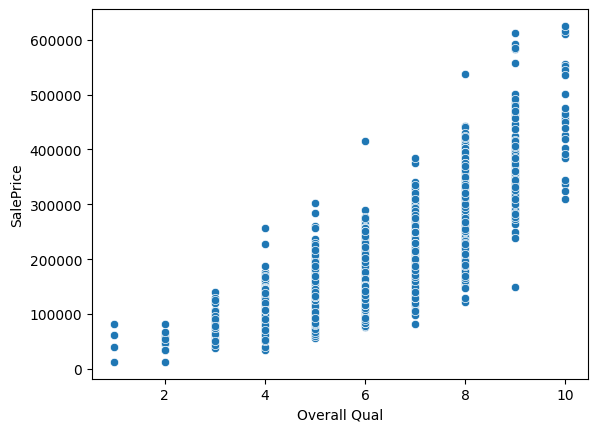

In [43]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=data)

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

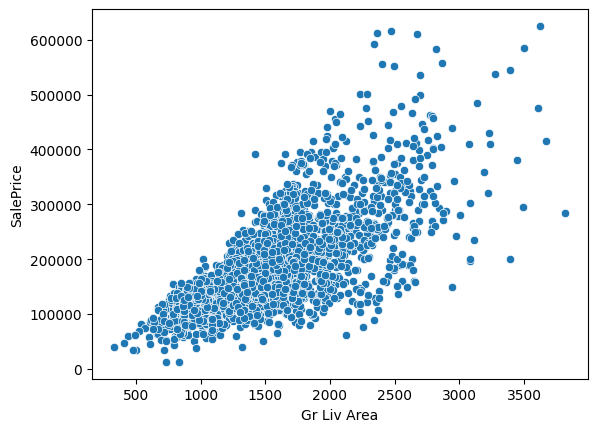

In [44]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=data)

In [45]:
data.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,...,False,False,False,False,True,False,False,False,True,False
1,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,False,False,False,False,True,False,False,False,True,False
2,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,False,False,False,False,True,False,False,False,True,False
3,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,...,False,False,False,False,True,False,False,False,True,False
4,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,False,False,False,False,True,False,False,False,True,False


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2925 entries, 0 to 2929
Columns: 258 entries, MS SubClass to Sale Condition_Partial
dtypes: bool(221), float64(11), int64(26)
memory usage: 1.5 MB


In [47]:
data.describe()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2924.000000,2924.000000,...,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000
mean,57.396581,69.023819,10103.583590,6.088205,5.563761,1971.302906,1984.234188,100.710544,438.097469,49.807456,...,93.392137,47.166838,23.050940,2.596923,16.029402,1.893333,44.909744,6.216752,2007.791453,180411.574701
std,42.668752,20.720789,7781.999124,1.402953,1.112262,30.242474,20.861774,175.340586,438.032289,169.300590,...,126.034142,66.571810,64.186809,25.162589,56.131397,32.964272,472.237990,2.711541,1.317408,78554.857286
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,60.000000,7438.000000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,50.000000,69.023819,9428.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,369.500000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,70.000000,78.000000,11515.000000,7.000000,6.000000,2001.000000,2004.000000,162.000000,733.250000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2288.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,15500.000000,12.000000,2010.000000,625000.000000


In [63]:
x= x.fillna(0)

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [65]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(x_train)
scaled_X_test = scaler.transform(x_test)

In [66]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [67]:
y_pred = model.predict(x_test)
y_pred

array([142182.97315745, 447841.6758047 , 215783.98960364, 221297.8335402 ,
       142446.29507431, 198011.96834684,  92131.42169298, 146976.35324573,
       135494.27012263, 176413.80055304, 126115.4217857 , 254557.48380918,
       171876.23359802, 332338.17971644, 146127.74993367, 148612.92574128,
       116081.38968725, 258150.37236343, 185994.55766809, 128420.37711038,
       127240.43985659, 161040.37484647, 125667.24292457, 139194.8207578 ,
       149718.8538976 , 259237.16439858, 191408.28455246, 152169.82396639,
       133165.89158222, 179288.16726363, 268002.99385634,  33176.17667651,
       174245.39889429, 114974.35531566, 232377.76516596, 127543.44678184,
       222645.50022833, 159265.61197469, 165894.54024776, 217438.71286817,
       134491.12945316, 256659.48038842, 117379.30705421, 132970.99007225,
       186582.60903711, 197684.77943674,  72297.20384826, 150395.03808352,
        82432.04963945, 131340.22787971, 208947.01070869, 322018.51792437,
       230884.20710008, 1

In [68]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9413530070843845